In [4]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
%matplotlib inline
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean*2      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 10,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
def plot_et(N, S, L_index, clims=[-7,0], filename=None):
    ''' plot energy vs time spectra for N, S arrays (phi, p, alpha, etc)
        clims are log10 scale
    '''
    
    tvec = np.linspace(sc['TIME_STEP'],sc['TIME_MAX'],sc['NUM_TIMES'])

    pN_P = np.log10(N[:,:,L_index])
    np.clip(pN_P,clims[0],clims[1],out=pN_P)

    pS_P = np.log10(S[:,:,L_index])
    np.clip(pS_P,clims[0],clims[1],out=pS_P)

    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    # The goods
    p1 = ax1.imshow(pN_P,origin='lower',aspect='auto',interpolation='none', cmap = plt.cm.get_cmap('jet'))
    p1.set_clim(clims)
    p2 = ax2.imshow(pS_P,origin='lower',aspect='auto', interpolation='none',cmap = plt.cm.get_cmap('jet'))
    p2.set_clim(clims)

    # Colorbar
#    cax = fig.add_axes([0.77, 0.12, 0.025, 0.78])
    cax = fig.add_axes([0.92, 0.12, 0.025, 0.78])
    fig.colorbar(p1,cax=cax)

    # Label axes
    
    tlabels = np.arange(0,np.floor(sc['TIME_MAX']),step=2)
    tinds =  [np.argmax(tt <= tvec) for tt in tlabels]
    ax2.set_xticks(tinds)
    tlabel_strings = ['%d'%k for k in tlabels]
    ax2.set_xticklabels(tlabel_strings)
    

    ax1.get_xaxis().set_visible(False)

    # Label each power of 10
    logvals = np.arange(np.log10(sc['E_MIN']), np.log10(sc['E_MAX'])+1)
    einds =  [np.argmax(lv <= np.log10(sc['E_tot_arr'])) for lv in logvals]
    einds[-1] = sc['NUM_E'] - 1 

    ylabel_strings = ['$10^%d$'%k for k in logvals]
    ax1.set_yticks(einds)
    ax1.set_yticklabels(ylabel_strings)
    ax2.set_yticks(einds)
    ax2.set_yticklabels(ylabel_strings)
    
    ax2.set_xlabel('Time (sec)')
    ax1.set_ylabel('Energy (ev)')
    ax2.set_ylabel('Energy (ev)')
    
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    fig.canvas.draw()
    plt.show()
    
    if filename is not None:
        fig.savefig(filename)



In [82]:
#import sim_consts as sc
from load_sim_constants import load_sim_constants
from load_phi_files import load_phi_files_latlon

lon = 0.

directory = '/shared/users/asousa/WIPP/3dWIPP/outputs/herpyderpy/' 

# A dictionary of constants from the C++ constants file
sc = load_sim_constants('/shared/users/asousa/WIPP/3dWIPP/include/consts.h')

phi_N, phi_S, lats = load_phi_files_latlon(directory, lon, sc)
print np.shape(phifiles[0])

plot_et(phi_N, phi_S, 20, clims=[-20, 2])

# plt.figure()
# plt.plot(np.sum(phi_N[:,:,16],axis=0))

# print np.min(phi_N), np.max(phi_N)


No phi files found!
[]
[]


TypeError: 'NoneType' object is not iterable

phi_N range: 0, 7813.18
phi_S range: 0, 5378.17
phi_N range: 0, 1548.08
phi_S range: 0, 1319.6


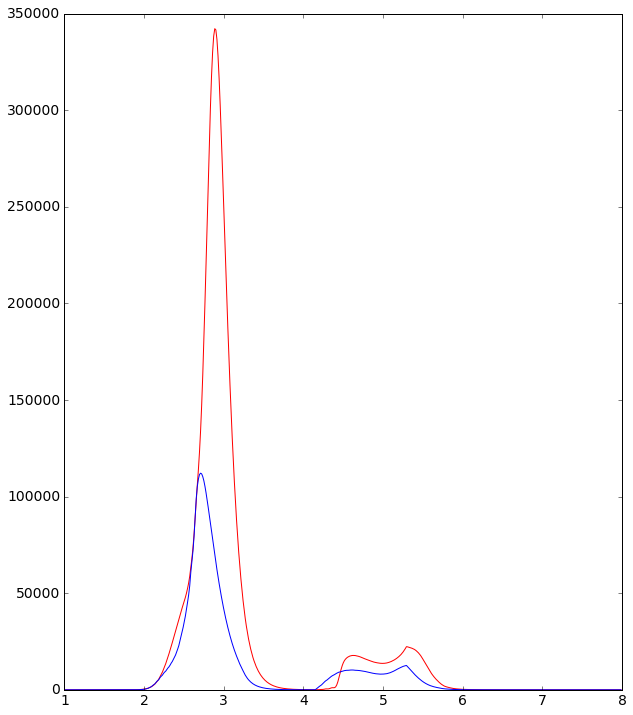

In [169]:
# Check if sum works out the same between different EA spacings:
L = 3
dir1 = '/Users/austin/FUSE/shared/users/asousa/WIPP/WIPPy/python/c/output/' 
dir2 = '/Users/austin/FUSE/shared/users/asousa/WIPP/WIPPy/python/c/output3/' 


phi_N1, phi_S1 = load_phi(dir1, L)
phi_N2, phi_S2 = load_phi(dir2, L)

plt.figure()
plt.plot(np.log10(sc.E_tot_arr), np.sum(phi_N1,axis=1),'r', np.log10(sc.E_tot_arr), np.sum(phi_N2,axis=1),'b')



In [52]:
freqs = np.arange(0,20)
def chunks(l, n):
    n = max(1, n)
    return [l[i:i + n] for i in range(0, len(l), n)]

# print freqs


nProcs = 4
nFreqs = np.shape(freqs)[0]

nSteps = np.floor(nFreqs/nProcs).astype(int)
print nSteps
chunks = [freqs[i:i+nSteps] for i in range(0, len(freqs), nSteps)]
print np.shape(chunks)

print chunks

print freqs
np.random.shuffle(freqs)
print freqs

5
(4, 5)
[array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9]), array([10, 11, 12, 13, 14]), array([15, 16, 17, 18, 19])]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[16  0  7 12 11  1 14  8  9 19  5  6 13 15  3 10 18  2  4 17]


failed: sc.T_STEP = (1.0*((1.0*T_MAX)/NUM_STEPS))
['phi_30_0_N.dat', 'phi_30_2_N.dat', 'phi_30_4_N.dat', 'phi_30_6_N.dat', 'phi_30_8_N.dat', 'phi_40_0_N.dat', 'phi_40_2_N.dat', 'phi_40_4_N.dat', 'phi_40_6_N.dat', 'phi_40_8_N.dat']
N NaNs: 0
S NaNs: 0
[ 30.  40.]
(512, 1000, 2)
max N:  421.622192383
max S:  77530.4296875


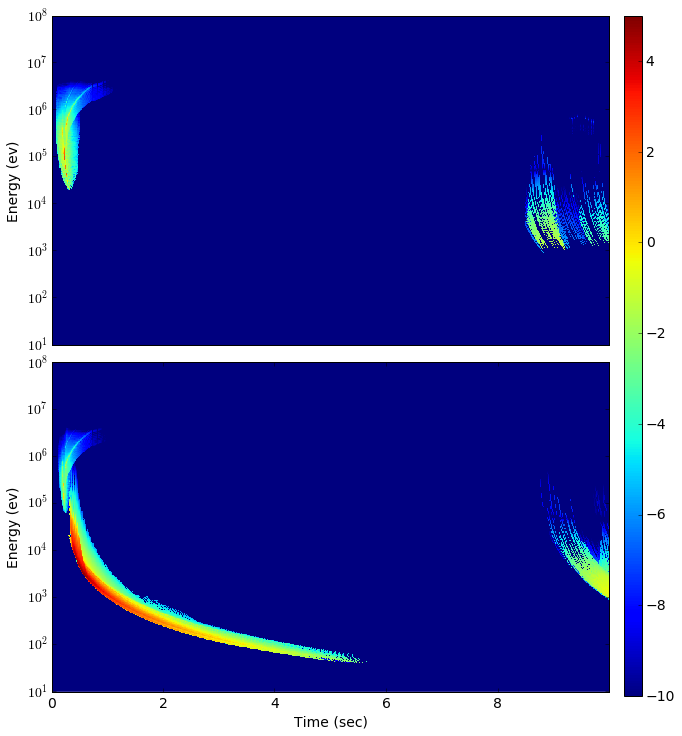

In [59]:
from load_phi_files import load_phi_files_latlon as load_phi_files
from load_sim_constants import load_sim_constants

lon = 0

directory = "/shared/users/asousa/WIPP/WIPPv4/outputs/testing/"

sc = load_sim_constants(os.path.join(directory, 'pwr_-10000','consts.h'), old_format=False)

pN, pS, latvec = load_phi_files(os.path.join(directory,'phi'), lon, sc)
print latvec
print np.shape(pN)
print "max N: ", np.max(pN)
print "max S: ", np.max(pS)


plot_et(pN, pS, 1, clims=[-10, 5])



In [67]:
# Test zip utility:
testdir = os.path.join(directory,'pwr_-10000','in_30','lat_40')
zipdir = os.path.join(testdir,'zips')

if not os.path.exists(zipdir):
    os.mkdir(zipdir)

    
import gzip
import shutil
for infile in os.listdir(testdir):
    inpath = os.path.join(testdir, infile);
    outpath = os.path.join(zipdir, infile);
    
    with open(inpath, 'rb') as f_in, gzip.open(outpath, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)


IOError: [Errno 21] Is a directory: '/shared/users/asousa/WIPP/WIPPv4/outputs/testing/pwr_-10000/in_30/lat_40/zips'